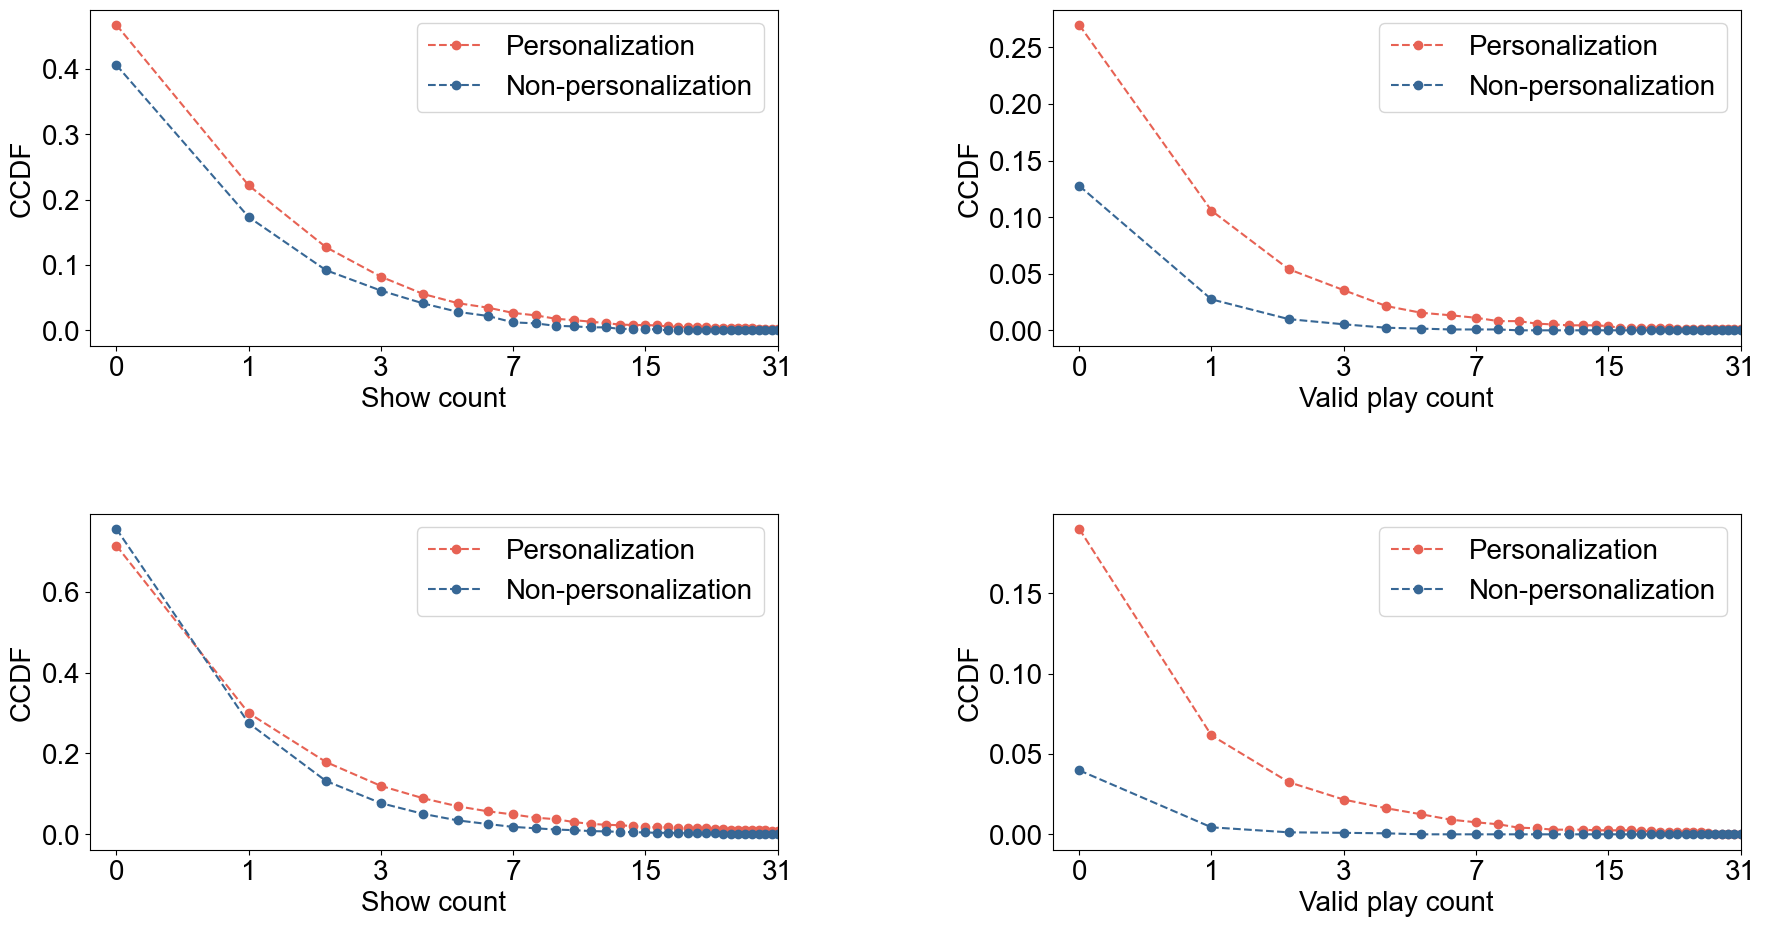

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

def get_ccdf_log(value_df, target):
    value_counts = value_df[target].value_counts()
    value_counts_df = pd.DataFrame({target: value_counts.index, 'count': value_counts.values})

    min_value = value_counts_df[target].min()
    max_value = value_counts_df[target].max()
    max_value = max(max_value, 32)
    values_range = list(range(min_value, max_value + 1))
    new_df = pd.DataFrame({target: values_range})
    value_counts_df = pd.merge(new_df, value_counts_df, on=target, how='left').fillna(0)
    value_counts_df = value_counts_df.sort_values(by=target, ascending=True)
    total_count = value_counts_df['count'].sum()
    value_counts_df['count'] = value_counts_df['count'] / total_count
    ccdf = list(1 - value_counts_df['count'].cumsum())
    return np.log2(value_counts_df[target]+1), ccdf[:] 


match_group = 'A'
fig, axes = plt.subplots(2,2,figsize = (18,10))

for m, page in enumerate(['featured', 'find']):
    for n, target in enumerate(['show_cnt', 'valid_play_cnt']):
        # read data
        personal_intercation_df = pd.read_csv(f'../data/personal_{page}_misinformation_interaction_group{match_group}.csv')
        personal_intercation_value_df = personal_intercation_df.groupby('device_id')[target].sum().reset_index()

        no_personal_intercation_df = pd.read_csv(f'../data/no_personal_{page}_misinformation_interaction_group{match_group}.csv')
        no_personal_intercation_value_df = no_personal_intercation_df.groupby('device_id')[target].sum().reset_index()

        # statistics and plot
        x, y = get_ccdf_log(personal_intercation_value_df, target)
        axes[m,n].plot(x, y, color='#e76254', linestyle='--', label='Personalization', marker = 'o')

        x, y = get_ccdf_log(no_personal_intercation_value_df, target)
        axes[m,n].plot(x, y, color='#376795', linestyle='--', label='Non-personalization', marker = 'o')
        axes[m,n].legend(fontsize = 20)
        axes[m,n].set_ylabel('CCDF', fontsize = 20)
        if target == 'show_cnt':
            x_label = 'Show count'
        else:
            x_label = 'Valid play count'
        axes[m,n].set_xlabel(x_label, fontsize = 20)  
        axes[m,n].set_xlim((-0.2,np.log(32)))
        axes[m,n].set_xticks([0, 1, 2, 3, 4, 5], [0, 1, 3, 7, 15, 31])
        axes[m, n].tick_params(labelsize=20) 

plt.tight_layout()
plt.subplots_adjust(left=0.06, bottom=0.08, right=0.977, top=0.92, wspace=0.4, hspace=0.5)
plt.show()